In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', 
                names= ['target', 'x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16'])
df.head()

,target,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [2]:
#Challenge 1

df.replace(to_replace=('n','y','?'),value=(0,1,np.NaN),inplace=True)
df = df.fillna(df.mean())

In [3]:
#Challenge 2

from sklearn.cross_validation import train_test_split

X = df.drop('target',axis=1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4444)

In [4]:
#Challenge 3

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

scores = []
score = 0

for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    scores.append((score,i))

print max(scores)

(0.93129770992366412, 10)


In [5]:
#Challenge 4

from sklearn import linear_model, datasets

logreg = linear_model.LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
scorelog = metrics.accuracy_score(y_test, y_pred)

print scorelog

0.93893129771


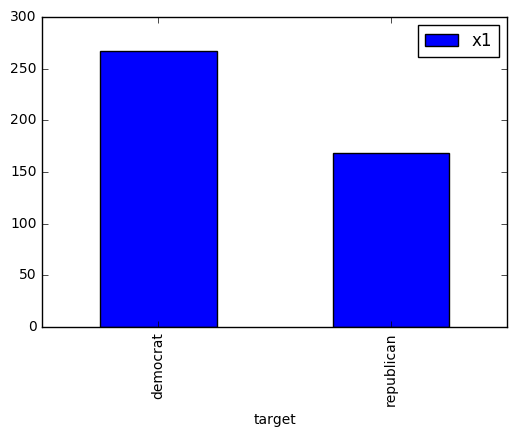

In [6]:
#Challenge 5

import matplotlib.pyplot as plt
%matplotlib inline

dfbar = df.groupby('target').count()

dfbar.plot.bar(y='x1')

In [7]:
#Challenge 5 continued

def dempredictor(x):
    l = len(x)
    return ['democrat']*l

def goppredictor(x):
    l = len(x)
    return ['republican']*l

y_pred = dempredictor(X_test)
y_pred2 = goppredictor(X_test)
scoreDem = metrics.accuracy_score(y_test, y_pred)
scoreGop = metrics.accuracy_score(y_test, y_pred2)
print 'Dempred accuracy: ' + str(scoreDem) 
print 'Goppred accuracy: ' + str(scoreGop)

Dempred accuracy: 0.587786259542
Goppred accuracy: 0.412213740458


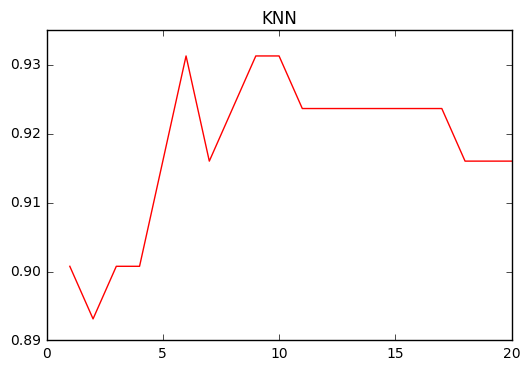

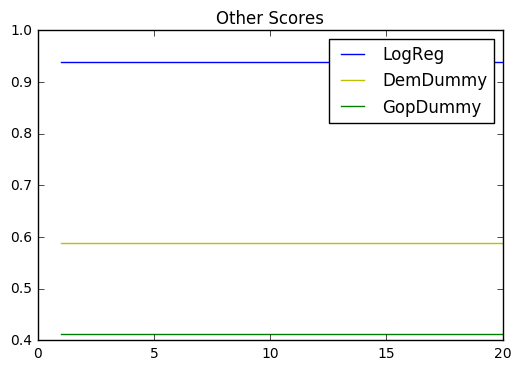

In [31]:
#Challenge 6
%matplotlib inline
temp = []

for i in range(1,21):
    temp.append(scores[i-1][0])

scoresKNN = list(zip(range(1,21), temp))
scoresLogReg = list(zip(range(1,21),[scorelog]*20))
scoresDem = list(zip(range(1,21),[scoreDem]*20))
scoresGop = list(zip(range(1,21),[scoreGop]*20))

from numpy import *
import math
import matplotlib.pyplot as plt

g = range(1,21)
k = scoresKNN
a = scoresLogReg
b = scoresDem
c = scoresGop

plt.plot(g, temp, 'r') # plotting t,a separately 
plt.title('KNN')
plt.show()

f, ax = plt.subplots()
ax.plot(g, [scorelog]*20, 'b',label='LogReg')
ax.plot(g, [scoreDem]*20, 'y',label="DemDummy")
ax.plot(g, [scoreGop]*20, 'g',label="GopDummy")
ax.set_title('Other Scores')
ax.legend()




In [36]:
#Challenge 7

from sklearn.learning_curve import learning_curve

estimator = linear_model.LogisticRegression()
m, train_err, ts_err = learning_curve(estimator, X, y, train_sizes=[50, 80, 110], cv=5)
train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(ts_err, axis=1)

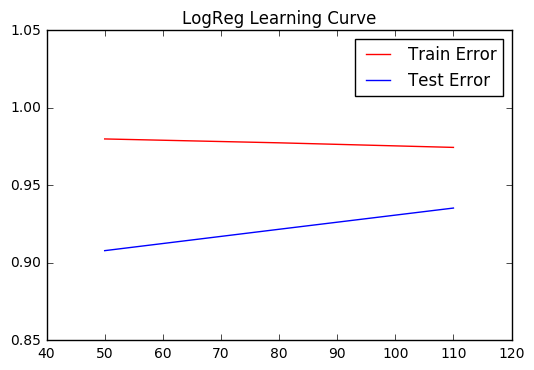

In [41]:
plt.plot(m, train_cv_err, 'r',label='Train Error') # plotting t,a separately 
plt.plot(m, test_cv_err, 'b',label='Test Error')
plt.axis([40,120,.85,1.05])
plt.legend()
plt.title('LogReg Learning Curve')
plt.show()

In [47]:
#Challenge 8
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

algs = [GaussianNB(), SVC(), DecisionTreeClassifier(), RandomForestClassifier()]

scores = []

for item in algs:
    item.fit(X_train, y_train)
    y_pred = item.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    scores.append((str(item).split('(')[0], score))
print scores

[('GaussianNB', 0.93893129770992367), ('SVC', 0.95419847328244278), ('DecisionTreeClassifier', 0.93893129770992367), ('RandomForestClassifier', 0.94656488549618323)]


In [51]:
#Challenge 9
from sklearn.cross_validation import cross_val_score

for item in algs:
    print mean(cross_val_score(item, X, y))

0.931034482759
0.954022988506
0.944827586207
0.95632183908


In [61]:
#Challenge 10 

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', 
                names= ['target', 'x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16'])

df.replace(to_replace=('n','y','?'),value=(0,1,np.NaN),inplace=True)
df = df.fillna(df.median())

from sklearn.Logistic_Regression import LogisticRegression

ImportError: No module named Logistic_Regression